### Mission 1. Netfilx and Code

**Mandatory Part**
- 한국 작품은 총 얼마나 있는가?

In [133]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [134]:
import pandas as pd

In [135]:
netflix=pd.read_csv("netflix_titles.csv")
print(netflix)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [136]:
netflix["country"][netflix["country"]=="South Korea"].count()

199

**Bouns Part**


- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?


In [137]:
print(netflix["country"].value_counts().head(1),max(netflix["country"].value_counts()))

United States    2818
Name: country, dtype: int64 2818


### Mission 2. 가즈아!

**Mandatory Part**

- 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

In [138]:
bit_coin=pd.read_csv("BitCoin.csv")
bit_coin=bit_coin.drop(["Idx"],axis=1)
bit_coin.sort_values("Date",ascending=True,inplace=True)
bit_coin.set_index("Date",inplace=True)

print(bit_coin)

               Open     High      Low    Close        Volume   Market Cap
Date                                                                     
2013-01-05   139.00   139.89   107.72   116.99  8.026719e+06   1542820000
2013-01-06   128.81   129.78   127.20   129.30  7.521960e+06   1445800000
2013-01-07    97.51    97.66    86.30    88.05  5.759986e+06   1107130000
2013-01-08   106.21   108.00   103.01   104.00  6.348195e+06   1220190000
2013-01-09   135.14   145.81   134.81   138.34  8.179728e+06   1572230000
...             ...      ...      ...      ...           ...          ...
2017-12-05  1845.76  1856.15  1694.01  1724.24  7.409840e+08  30131100000
2017-12-06  2953.22  2997.26  2518.56  2659.63  2.569530e+09  48391200000
2017-12-07  2332.77  2423.71  2275.14  2398.84  1.117410e+09  38355900000
2017-12-08  3650.63  3949.92  3613.70  3884.71  2.219590e+09  60242100000
2017-12-09  4168.88  4344.65  4085.22  4130.81  1.864530e+09  69033400000

[1609 rows x 6 columns]


In [139]:
bit_df=bit_coin[["Open","High","Low","Close"]]

bit_df=bit_df[(bit_coin.index>="2016-06-01") & (bit_coin.index<"2017-07-01")]

bit_df=bit_df['Open'].rolling(window=5).mean()

print(bit_df.index)
print(bit_df)


Index(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04', '2016-06-05',
       '2016-06-06', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
       ...
       '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
       '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30'],
      dtype='object', name='Date', length=377)
Date
2016-06-01         NaN
2016-06-02         NaN
2016-06-03         NaN
2016-06-04         NaN
2016-06-05     418.238
                ...   
2017-06-26    2666.942
2017-06-27    2624.426
2017-06-28    2593.564
2017-06-29    2559.372
2017-06-30    2545.770
Name: Open, Length: 377, dtype: float64


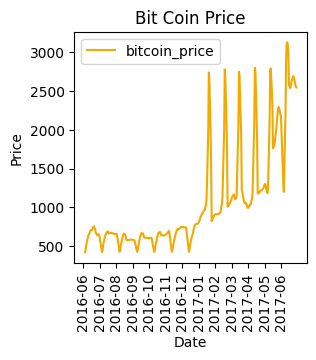

In [140]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3,3))
fig.set_facecolor('white')

plt.plot(bit_df.index, bit_df, color='#f2a900', label='bitcoin_price')
plt.xticks(rotation=90,ticks=[i for i in range(1,377,29)] ,labels=["2016-06","2016-07","2016-08","2016-09","2016-10","2016-11",
                               "2016-12","2017-01","2017-02","2017-03","2017-04","2017-05","2017-06"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title('Bit Coin Price')
plt.show()

In [141]:
ETH=pd.read_csv("ETH_day.csv")

ETH.sort_values("Date",ascending=True,inplace=True)
print(ETH)

            Date  Symbol    Open    High     Low   Close  Volume ETH  \
1437  2016-05-09  ETHUSD   12.00   12.00    9.36    9.98     1317.90   
1436  2016-05-10  ETHUSD    9.98    9.98    9.36    9.68      672.06   
1435  2016-05-11  ETHUSD    9.68   10.47    9.68   10.43     3052.51   
1434  2016-05-12  ETHUSD   10.43   12.00    9.92   10.20     2072.56   
1433  2016-05-13  ETHUSD   10.20   11.59   10.20   10.69     1769.71   
...          ...     ...     ...     ...     ...     ...         ...   
4     2020-04-11  ETHUSD  158.26  161.49  154.25  158.66    13761.72   
3     2020-04-12  ETHUSD  158.66  165.37  155.21  158.56    12877.33   
2     2020-04-13  ETHUSD  158.56  159.51  150.12  156.97    15698.32   
1     2020-04-14  ETHUSD  156.97  162.15  155.74  158.61    18061.58   
0     2020-04-15  ETHUSD  158.61  158.61  158.61  158.61        0.00   

      Volume USD  
1437    12885.06  
1436     6578.20  
1435    30978.11  
1434    22183.39  
1433    18923.55  
...          ...  
4 

In [150]:
ETH_df=ETH[["Date","Open","High","Low","Close"]]



ETH_df.set_index("Date",inplace=True)


ETH_df=ETH_df[(ETH_df.index>="2016-06-01") & (ETH_df.index<"2017-07-01")]

ETH_df=ETH_df['Open'].rolling(window=5).mean()
#print(ETH_df)
#print(ETH_df.index)


Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []


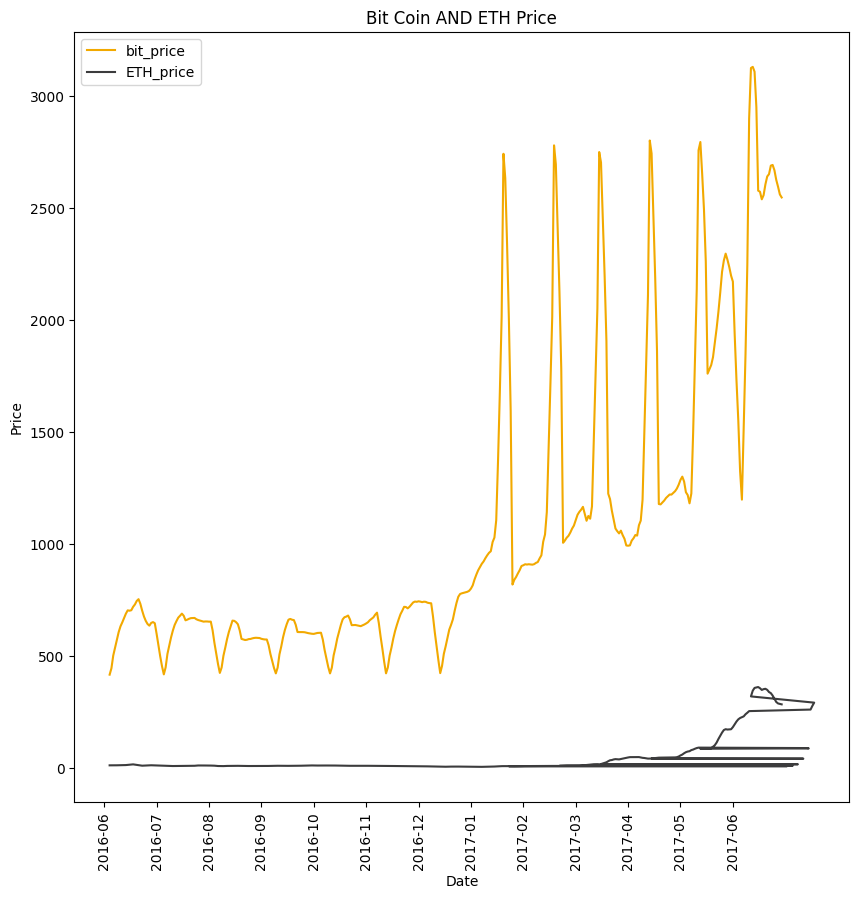

In [148]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

plt.plot(bit_df.index, bit_df, color='#f2a900', label='bit_price')
plt.plot(ETH_df.index, ETH_df, color='#3c3c3d', label='ETH_price')
plt.xticks(rotation=90,ticks=[i for i in range(1,377,29)] ,labels=["2016-06","2016-07","2016-08","2016-09","2016-10","2016-11",
                               "2016-12","2017-01","2017-02","2017-03","2017-04","2017-05","2017-06"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title('Bit Coin AND ETH Price')
plt.show()